In [5]:
import numpy as np
import scanpy as sc
import cinemaot as co
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from metrics import calculate_metrics

import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

R_HOME is already set to: /vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R


/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/benchmark/metrics.py:29: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


# ECCITE dataset

In [3]:
adata=sc.read_h5ad("./cinema_ot/ECCITE_ITE.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 18343 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase', 'n_genes'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_embedding'


['/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3'
 '/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/library']


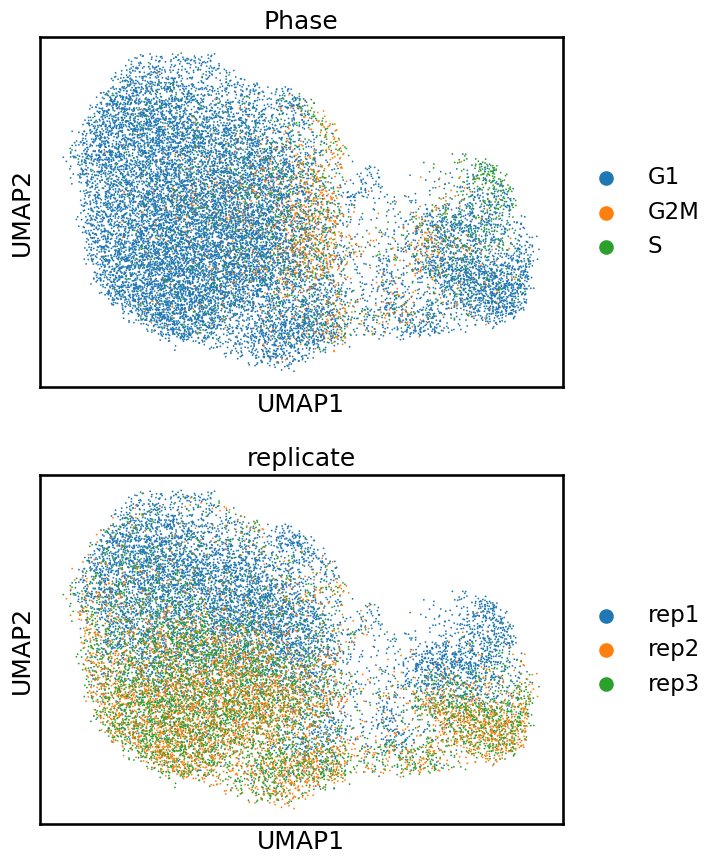

LISI---
cLISI, bLISI, LISI_F1 0.7965843046152714 0.4868051241005091 0.6043081119232642
ASW---
asw_label 0.4917604774236679
asw_batch 0.9788895907949907
kBET---
0 labels consist of a single batch or is too small. Skip.
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
kbet_score 0.24566865430149265
graph_conn 0.9348237311371309
NMI, ARI ---
NMI 0.0828048337037232
ARI 0.022817957903961936
positive and true positive rate---
       ASW_label       ARI       NMI   1-cLISI     bLISI  ASW_batch  \
X_pca    0.49176  0.022818  0.082805  0.796584  0.486805    0.97889   

       kBET Accept Rate  graph connectivity  PCR_batch  pos rate  \
X_pca          0.245669            0.934824        0.0  0.876193   

       true pos rate   F1 LISI  
X_pca       0.183776  0.604308  


,ASW_label,ARI,NMI,1-cLISI,bLISI,ASW_batch,kBET Accept Rate,graph connectivity,PCR_batch,pos rate,true pos rate,F1 LISI
X_pca,0.49176,0.022818,0.082805,0.796584,0.486805,0.97889,0.245669,0.934824,0.0,0.876193,0.183776,0.604308


In [8]:
import rpy2.robjects as robjects
import anndata2ri
anndata2ri.activate()
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
# Update R's library paths
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color=["Phase",'replicate'],ncols=1)
calculate_metrics(adata, batch_key='replicate',celltype_key="Phase", all=True, n_neighbors=15)

# ASD dataset

In [ ]:
adata1=sc.read_h5ad("./cinema_ot/ASD_ITE.h5ad")
print(adata1)

In [ ]:
import rpy2.robjects as robjects
import anndata2ri
anndata2ri.activate()
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
# Update R's library paths
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))

sc.pp.pca(adata1)
sc.pp.neighbors(adata1)
sc.tl.umap(adata1)
sc.pl.umap(adata1,color=['Batch',"CellType"],ncols=1)
calculate_metrics(adata1, batch_key='Batch',celltype_key="CellType", all=True, n_neighbors=15)

# ASD dataset (filtered)

In [ ]:
adata2=sc.read_h5ad("./cinema_ot/ASD1_ITE.h5ad")
print(adata2)

In [ ]:
import rpy2.robjects as robjects
import anndata2ri
anndata2ri.activate()
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
# Update R's library paths
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))

sc.pp.pca(adata2)
sc.pp.neighbors(adata2)
sc.tl.umap(adata2)
sc.pl.umap(adata2,color=['Batch',"CellType"],ncols=1)
calculate_metrics(adata2, batch_key='Batch',celltype_key="CellType", all=True, n_neighbors=15)